## Final Project Submission

Please fill out:
* Student name:  Motalo Musesya
* Student pace: part time 
* Scheduled project review date/time:  19/12/2025
* Instructor name: Maryann Mwikali
* Blog post URL:


In [62]:
# Your code here - remember to use markdown cells for comments as well!

# Aviation Accident Data Analysis: Identifying High- and Low-Risk Aircraft Models

## Introduction
This analysis uses the (Aviation_Data.csv) to evaluate aircraft safety by model.  

**Business Goal**: Provide actionable insights for aviation stakeholders (e.g., regulators, insurers, pilots) on which aircraft models pose the highest risks based on historical accidents.  

Key Metrics:  
- Average Fatalities per Accident (severity when crash occurs)  
- Proportion of Fatal Accidents (% of incidents with ≥1 fatality)  
- Total Accidents (for context and statistical relevance)  

We filter models with ≥10 accidents to ensure reliable statistics.  

Data cleaning and analysis performed with pandas; interactive dashboard created in Tableau.

## Step 1: Import Libraries and Load Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data/Aviation_Data.csv')

print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
df.head()

Dataset loaded: 90348 rows, 31 columns


C:\Users\user\AppData\Local\Temp\ipykernel_19008\2219413328.py:6: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/Aviation_Data.csv')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Step 2: Data Cleaning and Preparation
- Standardize Make and Model (uppercase, strip whitespace)  
- Combine into Make_Model  
- Convert Total.Fatal.Injuries to numeric, fill NaN with 0 (missing likely means no fatalities)  

In [3]:
# Cleaning
df['Make'] = df['Make'].astype(str).str.upper().str.strip()
df['Model'] = df['Model'].astype(str).str.upper().str.strip()
df['Make_Model'] = df['Make'] + ' ' + df['Model']

df['Total.Fatal.Injuries'] = pd.to_numeric(df['Total.Fatal.Injuries'], errors='coerce').fillna(0)

print("Cleaning complete. Sample:")
df[['Make_Model', 'Total.Fatal.Injuries']].head()

Cleaning complete. Sample:


,Make_Model,Total.Fatal.Injuries
0,STINSON 108-3,2.0
1,PIPER PA24-180,4.0
2,CESSNA 172M,3.0
3,ROCKWELL 112,2.0
4,CESSNA 501,1.0


## Step 3: Aggregate Risk Metrics by Model
Group by Make_Model and calculate:  
- Total Accidents  
- Total Fatalities  
- Fatal Accidents (count where fatalities > 0)  
- Avg Fatalities per Accident  
- Proportion Fatal  

In [4]:
grouped = df.groupby('Make_Model').agg(
    Total_Accidents=('Event.Id', 'count'),
    Total_Fatalities=('Total.Fatal.Injuries', 'sum'),
    Fatal_Accidents=('Total.Fatal.Injuries', lambda x: (x > 0).sum())
).reset_index()

grouped['Avg_Fatalities_Per_Accident'] = grouped['Total_Fatalities'] / grouped['Total_Accidents']
grouped['Proportion_Fatal'] = grouped['Fatal_Accidents'] / grouped['Total_Accidents']

# Filter for statistical relevance (≥10 accidents)
filtered = grouped[grouped['Total_Accidents'] >= 10].copy()

filtered.describe()

,Total_Accidents,Total_Fatalities,Fatal_Accidents,Avg_Fatalities_Per_Accident,Proportion_Fatal
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000
mean,61.118497,29.380539,11.512524,0.610515,0.204146
std,134.039202,70.443715,21.650359,1.329559,0.139398
min,10.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,4.000000,2.000000,0.153846,0.095734
50%,24.000000,10.000000,5.000000,0.343750,0.186127
75%,54.000000,28.000000,11.000000,0.677592,0.300000
max,2366.000000,1348.000000,250.000000,19.050000,0.727273


### Visualizations in Python (Supporting Analysis)

### Visualization 1: Top 20 Models by Average Fatalities per Accident
Answers: Which models are deadliest per crash?

C:\Users\user\AppData\Local\Temp\ipykernel_19008\65243003.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_avg, y='Make_Model', x='Avg_Fatalities_Per_Accident', palette='Reds_d')


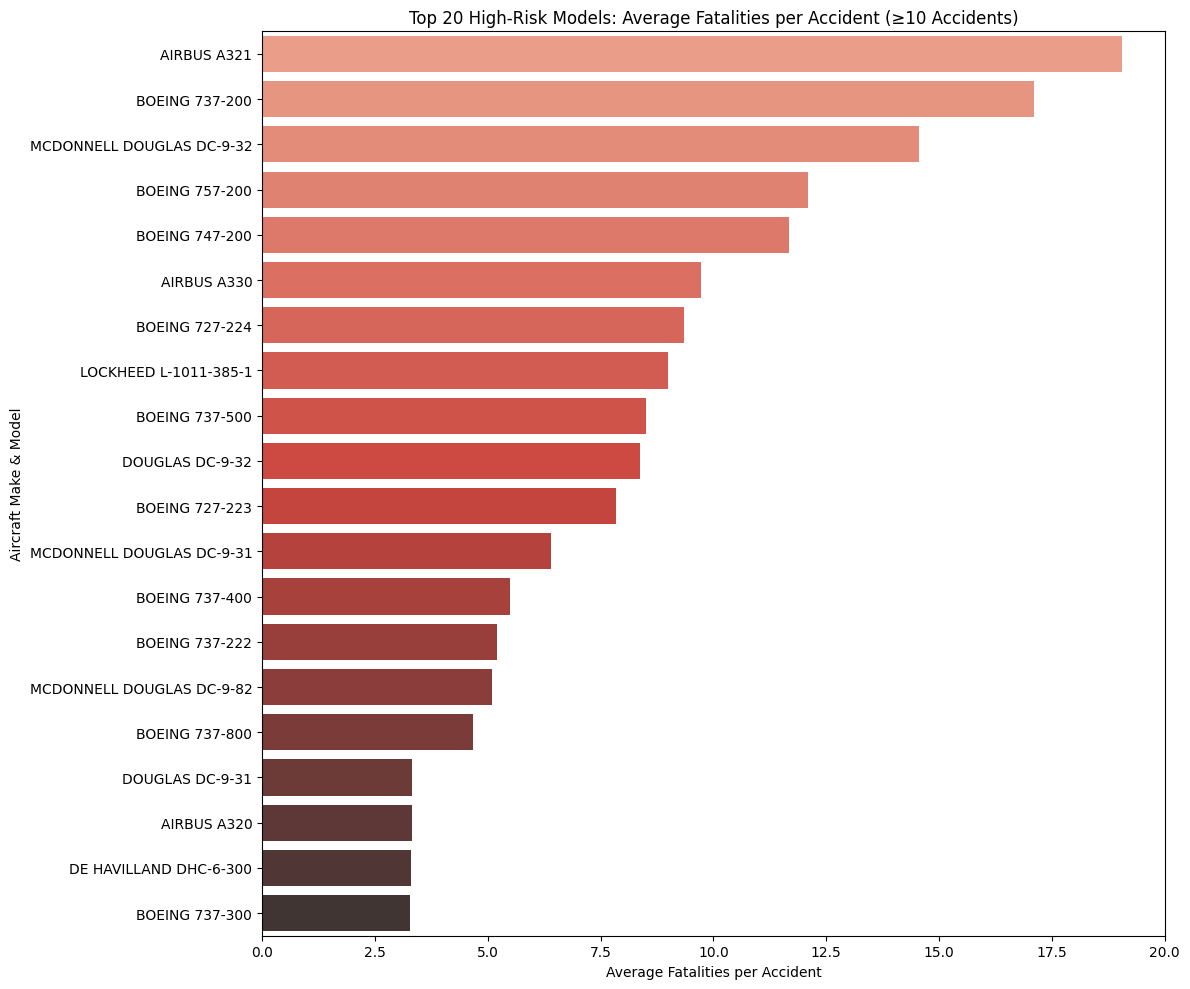

In [5]:
top_avg = filtered.sort_values('Avg_Fatalities_Per_Accident', ascending=False).head(20)

plt.figure(figsize=(12, 10))
sns.barplot(data=top_avg, y='Make_Model', x='Avg_Fatalities_Per_Accident', palette='Reds_d')
plt.title('Top 20 High-Risk Models: Average Fatalities per Accident (≥10 Accidents)')
plt.xlabel('Average Fatalities per Accident')
plt.ylabel('Aircraft Make & Model')
plt.tight_layout()
plt.show()

**Insight**: Commercial jets (e.g., older Boeing/Airbus variants) dominate due to high passenger counts in rare catastrophic events.

### Visualization 2: Top 20 Models by Proportion of Fatal Accidents
Answers: Which models most often result in fatalities?

C:\Users\user\AppData\Local\Temp\ipykernel_19008\3049932169.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_prop, y='Make_Model', x='Proportion_Fatal', palette='viridis')


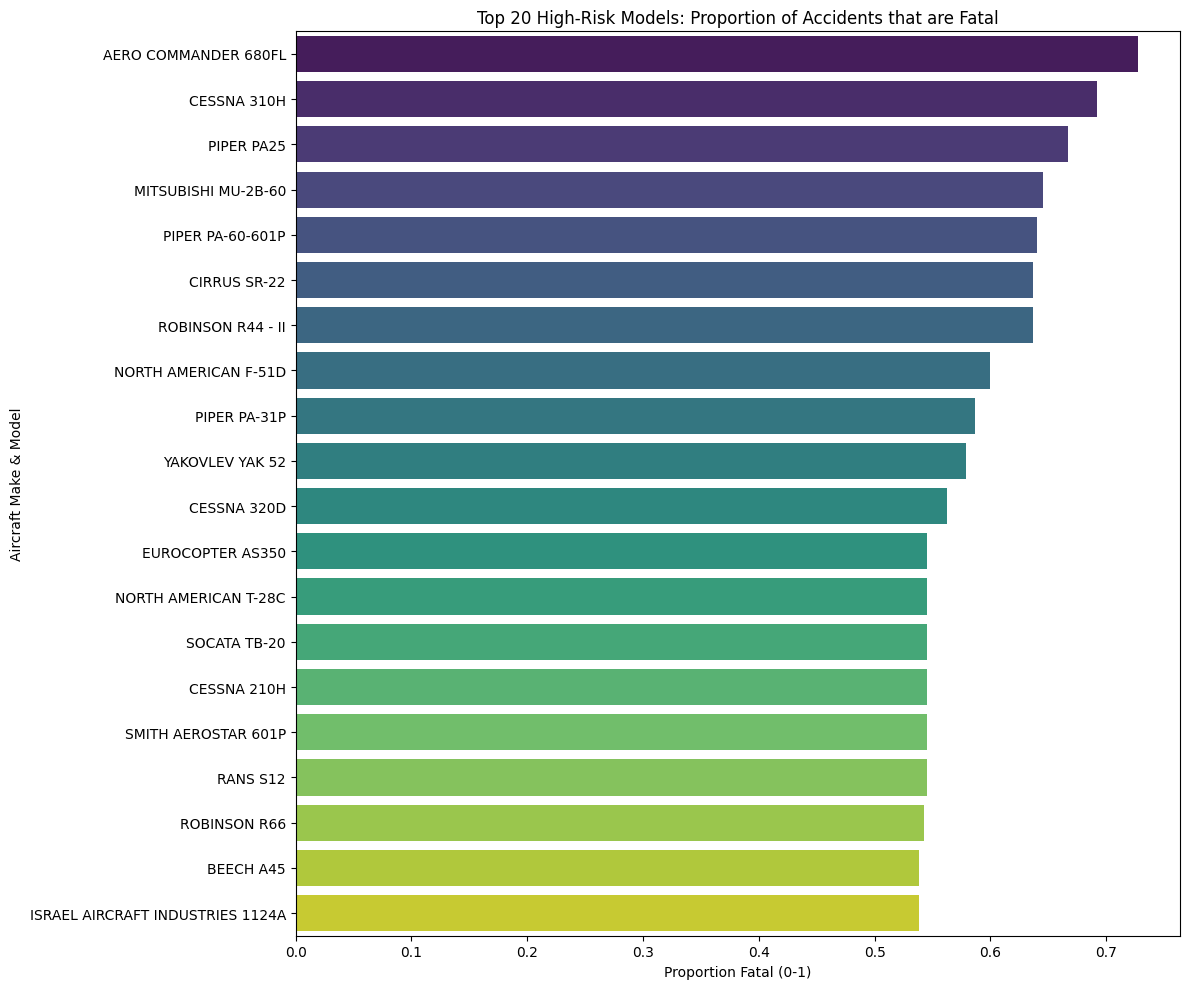

In [6]:
top_prop = filtered.sort_values('Proportion_Fatal', ascending=False).head(20)

plt.figure(figsize=(12, 10))
sns.barplot(data=top_prop, y='Make_Model', x='Proportion_Fatal', palette='viridis')
plt.title('Top 20 High-Risk Models: Proportion of Accidents that are Fatal')
plt.xlabel('Proportion Fatal (0-1)')
plt.ylabel('Aircraft Make & Model')
plt.tight_layout()
plt.show()


**Insight**: General aviation twins and certain helicopters have higher fatality rates per incident.

### Visualization 3: Risk Landscape Scatter Plot
Answers: Relationship between accident frequency and severity?

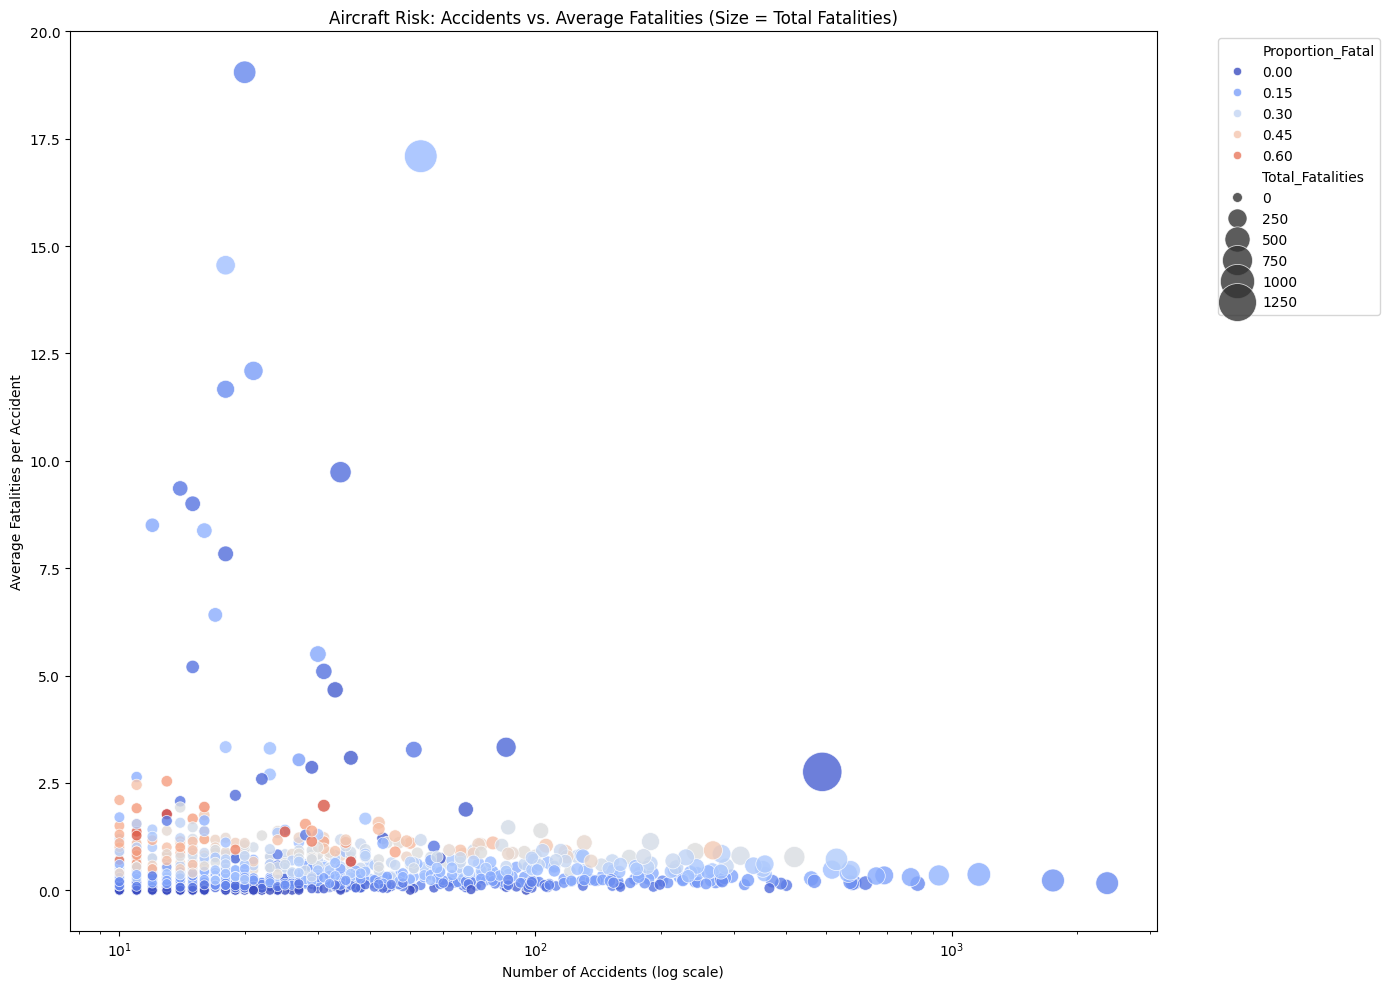

In [7]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=filtered,
                x='Total_Accidents',
                y='Avg_Fatalities_Per_Accident',
                size='Total_Fatalities',
                hue='Proportion_Fatal',
                palette='coolwarm',
                sizes=(50, 800),
                alpha=0.8)
plt.title('Aircraft Risk: Accidents vs. Average Fatalities (Size = Total Fatalities)')
plt.xlabel('Number of Accidents (log scale)')
plt.xscale('log')
plt.ylabel('Average Fatalities per Accident')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Insight**: Popular models (high accidents) tend to have lower average fatalities (safer per incident), while rare models can be more deadly.